<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/Data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Згенеруйте дані на основі ковзаючих вікон(цільовий стовпчик `totals_transactionRevenue`)

In [53]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/refs/heads/main/module3/data/data.csv",
                 index_col=0)

In [54]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,...,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd
0,Organic Search,20171016,5882839380479893026,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,20171016,169064020318706586,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,20171016,6157754009880713732,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20171016,7805861212153847553,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20171016,5130680452619315824,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Завдання 1

Перетворіть стовпчик `date` у тип дати та виведіть гістограму. На її основі виберіть розміри вікон та пропуск

In [55]:
df.date = df.date.astype(str)
df.date = pd.to_datetime(df.date)
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,...,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd
0,Organic Search,2017-10-16,5882839380479893026,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,2017-10-16,169064020318706586,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,2017-10-16,6157754009880713732,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2017-10-16,7805861212153847553,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,2017-10-16,5130680452619315824,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

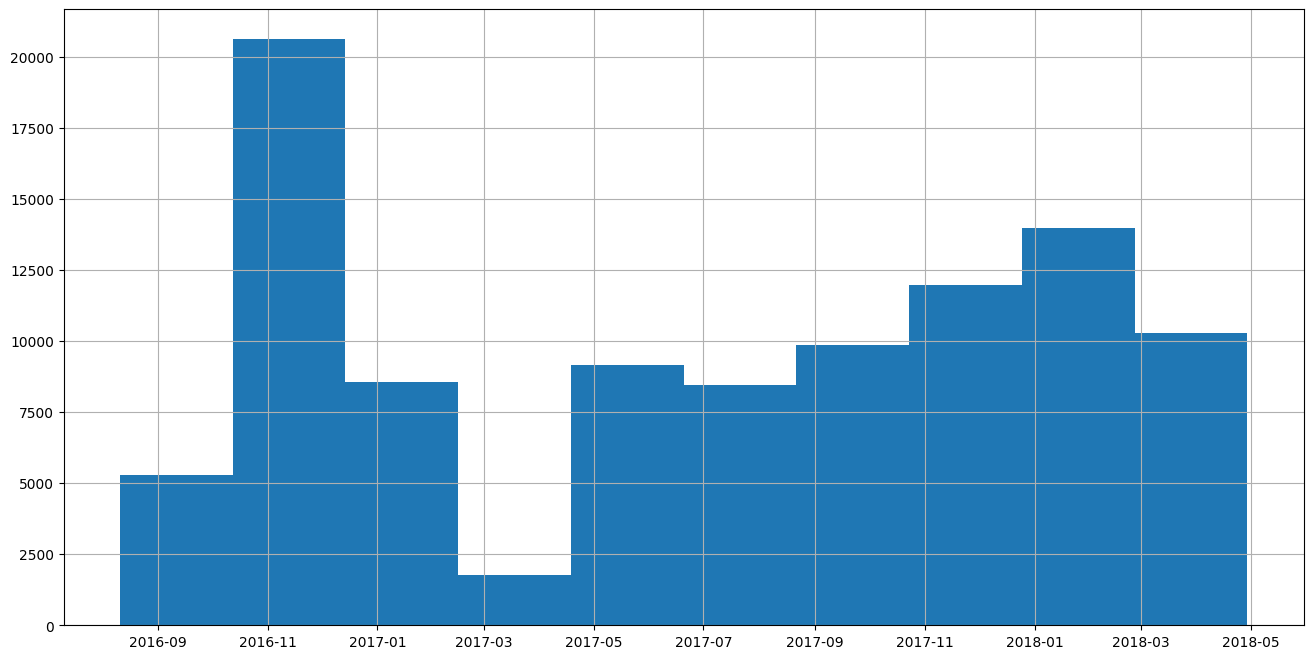

In [56]:
df.date.hist(figsize=(16, 8))

In [57]:
df.groupby(by='date')[['date', 'fullVisitorId']].count()

,date,fullVisitorId
date,,
2016-08-11,2667,2667
2016-09-02,2613,2613
2016-10-14,2838,2838
2016-11-10,4055,4055
2016-11-12,3119,3119
2016-11-18,3654,3654
2016-11-23,3805,3805
2016-12-13,3166,3166
2017-01-11,2185,2185


# Завдання 2

Отримайте дані з відповідних вікон

Формули для вікон по нумерації k=1,2,3,...

```bash
lower = df['date'].min() + (k-1)*window_X
upper = df['date'].min() + k*window_X
mask = (lower < df['date']) & (df['date'] < upper)
X = df[mask]
```

```bash
lower = df['date'].min() + k*window_X + gap
upper = df['date'].min() + k*window_X + gap + window_y
mask = (lower < df['date']) & (df['date'] < upper)
y = df[mask]
```

In [101]:
window_X = pd.Timedelta('90D')
gap = pd.Timedelta('30D')
window_y = pd.Timedelta('60D')

k=2

lower = df['date'].min() + (k-1)*window_X
upper = df['date'].min() + k*window_X
mask = (lower <= df['date']) & (df['date'] < upper)
X = df[mask]

lower = df['date'].min() + k*window_X + gap
upper = df['date'].min() + k*window_X + gap + window_y
mask = (lower <= df['date']) & (df['date'] < upper)
y = df[mask]

X.date.min(), X.date.max()

(Timestamp('2016-11-10 00:00:00'), Timestamp('2017-02-03 00:00:00'))

# Завдання 3

Створіть словник де ключ -- назва стовпчика, а значення -- список функцій:
* для числових - sum, mean, min, max
* для категоріальних - mode

Згрупуйте дані по користувачах(лише Х) та обрахуйте відповідні функції

In [59]:
def mod(col):
  mode = col.mode()
  if len(mode) > 0:
    return mode[0]
  return 'unknow'

In [60]:
numeric_cols = df.select_dtypes(include='number').columns.drop("fullVisitorId", 'date')
str_cols = df.select_dtypes(include='object').columns

parameters = dict()
for col in numeric_cols:
  parameters[col] = ['sum', 'mean', 'min', 'max']

for col in str_cols:
  parameters[col] = [mod]

parameters

{'visitId': ['sum', 'mean', 'min', 'max'],
 'visitNumber': ['sum', 'mean', 'min', 'max'],
 'visitStartTime': ['sum', 'mean', 'min', 'max'],
 'device_isMobile': ['sum', 'mean', 'min', 'max'],
 'totals_visits': ['sum', 'mean', 'min', 'max'],
 'totals_hits': ['sum', 'mean', 'min', 'max'],
 'totals_pageviews': ['sum', 'mean', 'min', 'max'],
 'totals_bounces': ['sum', 'mean', 'min', 'max'],
 'totals_newVisits': ['sum', 'mean', 'min', 'max'],
 'totals_sessionQualityDim': ['sum', 'mean', 'min', 'max'],
 'totals_timeOnSite': ['sum', 'mean', 'min', 'max'],
 'totals_transactions': ['sum', 'mean', 'min', 'max'],
 'totals_transactionRevenue': ['sum', 'mean', 'min', 'max'],
 'totals_totalTransactionRevenue': ['sum', 'mean', 'min', 'max'],
 'trafficSource_adwordsClickInfo.page': ['sum', 'mean', 'min', 'max'],
 'channelGrouping': [<function __main__.mod(col)>],
 'socialEngagementType': [<function __main__.mod(col)>],
 'device_browser': [<function __main__.mod(col)>],
 'device_browserVersion': [<funct

In [102]:
X_info = X.groupby(by="fullVisitorId").agg(parameters)
X_info.reset_index(inplace=True)
X_info

fullVisitorId      visitId                                        \
                                  sum          mean         min         max   
0       4681782413258180  39996239223  1.481342e+09  1478771032  1485487175   
1       4716754086642834  31112046954  1.481526e+09  1478827621  1485455777   
2      21234147381275782  32598916167  1.481769e+09  1478786338  1486174915   
3      24221961786219821  38536915274  1.482189e+09  1478775578  1486150367   
4      34208980776585217  39978846446  1.480698e+09  1478799278  1486195062   
..                   ...          ...           ...         ...         ...   
989  9947026042460614024  41467366620  1.480977e+09  1478773034  1486129733   
990  9958282727161780218  38528964437  1.481883e+09  1478788786  1486164673   
991  9959375007479901087  34064365449  1.481059e+09  1478770373  1486153712   
992  9972297848679017937  42984112491  1.482211e+09  1478774361  1486156488   
993  9977822218056364912  37019045051  1.480762e+09  1478772596  1486169948   

    visitNumber                     visitStartTime  ... trafficSource_medium  \
            sum       mean min  max            sum  ...                  mod   
0            50   1.851852   1    8    39996239223  ...               (none)   
1           324  15.428571   1  296    31112046954  ...             referral   
2            38   1.727273   1    8    32598916167  ...               (none)   
3            29   1.115385   1    2    38536915274  ...               (none)   
4            41   1.518519   1    8    39978846446  ...               (none)   
..          ...        ...  ..  ...            ...  ...                  ...   
989          43   1.535714   1    7    41467366620  ...               (none)   
990          33   1.269231   1    4    38528965243  ...               (none)   
991          41   1.782609   1    9    34064365449  ...               (none)   
992          53   1.827586   1   16    42984112491  ...               (none)   
993          29   1.160000   1    3    37019045051  ...               (none)   

    trafficSource_keyword trafficSource_adwordsClickInfo.criteriaParameters  \
                      mod                                               mod   
0          (not provided)                     not available in demo dataset   
1                  unknow                     not available in demo dataset   
2                  unknow                     not available in demo dataset   
3                  unknow                     not available in demo dataset   
4                  unknow                     not available in demo dataset   
..                    ...                                               ...   
989                unknow                     not available in demo dataset   
990                unknow                     not available in demo dataset   
991                unknow                     not available in demo dataset   
992                unknow                     not available in demo dataset   
993                unknow                     not available in demo dataset   

    trafficSource_referralPath trafficSource_isTrueDirect  \
                           mod                        mod   
0                            /                       True   
1                            /                       True   
2                            /                       True   
3                   /yt/about/                       True   
4                   /yt/about/                       True   
..                         ...                        ...   
989                 /yt/about/                       True   
990                          /                       True   
991                          /                       True   
992                 /yt/about/                       True   
993          /yt/about/es-419/                       True   

        trafficSource_adContent trafficSource_adwordsClickInfo.slot  \
                            mod                  

In [103]:
X_info.columns = ['fullVisitorId'] + ["_".join(col) for col in X_info.columns[1:]]

X_info.head()

,fullVisitorId,visitId_sum,visitId_mean,visitId_min,visitId_max,visitNumber_sum,visitNumber_mean,visitNumber_min,visitNumber_max,visitStartTime_sum,...,trafficSource_medium_mod,trafficSource_keyword_mod,trafficSource_adwordsClickInfo.criteriaParameters_mod,trafficSource_referralPath_mod,trafficSource_isTrueDirect_mod,trafficSource_adContent_mod,trafficSource_adwordsClickInfo.slot_mod,trafficSource_adwordsClickInfo.gclId_mod,trafficSource_adwordsClickInfo.adNetworkType_mod,trafficSource_adwordsClickInfo.isVideoAd_mod
0,4681782413258180,39996239223,1.481342e+09,1478771032,1485487175,50,1.851852,1,8,39996239223,...,(none),(not provided),not available in demo dataset,/,True,unknow,Top,CjwKEAiA2abEBRCdx7PqqunM1CYSJABf3qvahyQ6ImDiZv...,Google Search,False
1,4716754086642834,31112046954,1.481526e+09,1478827621,1485455777,324,15.428571,1,296,31112046954,...,referral,unknow,not available in demo dataset,/,True,unknow,unknow,unknow,unknow,unknow
2,21234147381275782,32598916167,1.481769e+09,1478786338,1486174915,38,1.727273,1,8,32598916167,...,(none),unknow,not available in demo dataset,/,True,unknow,unknow,unknow,unknow,unknow
3,24221961786219821,38536915274,1.482189e+09,1478775578,1486150367,29,1.115385,1,2,38536915274,...,(none),unknow,not available in demo dataset,/yt/about/,True,unknow,Top,Cj0KEQiA1b7CBRDjmIPL4u-Zy6gBEiQAsJhTMOgAhjqQwG...,Google Search,False
4,34208980776585217,39978846446,1.480698e+09,1478799278,1486195062,41,1.518519,1,8,39978846446,...,(none),unknow,not available in demo dataset,/yt/about/,True,unknow,unknow,unknow,unknow,unknow


# Завдання 4

Для даних з пізнішого вікна(у) обрахуйте суму `totals_transactionRevenue` для кожного користувача

In [80]:
y_info=y.groupby(by='fullVisitorId')['totals_transactionRevenue'].sum().reset_index()
y_info

,fullVisitorId,totals_transactionRevenue
0,4681782413258180,0
1,4716754086642834,0
2,21234147381275782,0
3,24221961786219821,0
4,34208980776585217,351010000
...,...,...
989,9947026042460614024,0
990,9958282727161780218,0
991,9959375007479901087,0
992,9972297848679017937,0


# Завдання 5

Об'єднайте дані по id користувачів, якщо з'являються NaN, то замініть нулем(користувач не користувався системою)

In [89]:
result = X_info.merge(y_info, on = "fullVisitorId").fillna(0)
result

,fullVisitorId,visitId_sum,visitId_mean,visitId_min,visitId_max,visitNumber_sum,visitNumber_mean,visitNumber_min,visitNumber_max,visitStartTime_sum,...,trafficSource_keyword_mod,trafficSource_adwordsClickInfo.criteriaParameters_mod,trafficSource_referralPath_mod,trafficSource_isTrueDirect_mod,trafficSource_adContent_mod,trafficSource_adwordsClickInfo.slot_mod,trafficSource_adwordsClickInfo.gclId_mod,trafficSource_adwordsClickInfo.adNetworkType_mod,trafficSource_adwordsClickInfo.isVideoAd_mod,totals_transactionRevenue
0,4681782413258180,4414692482,1.471564e+09,1470931965,1472823779,11,3.666667,1,8,4414692482,...,(not provided),not available in demo dataset,/,True,unknow,unknow,unknow,unknow,unknow,0
1,4716754086642834,10307998764,1.472571e+09,1470954100,1472878843,9,1.285714,1,2,10307998764,...,(not provided),not available in demo dataset,/yt/about/,True,unknow,Top,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRMY-4jVpxN...,Google Search,False,0
2,21234147381275782,5889467116,1.472367e+09,1470928159,1472848357,5,1.250000,1,2,5889467116,...,(not provided),not available in demo dataset,/,True,unknow,unknow,unknow,unknow,unknow,0
3,24221961786219821,8833223699,1.472204e+09,1470921753,1472877587,10,1.666667,1,3,8833223699,...,(not provided),not available in demo dataset,/,True,unknow,unknow,unknow,unknow,unknow,0
4,34208980776585217,11777012534,1.472127e+09,1470957947,1472840146,17,2.125000,1,9,11777012534,...,(not provided),not available in demo dataset,/optimize/home/,True,unknow,unknow,unknow,unknow,unknow,351010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,9947026042460614024,1472852579,1.472853e+09,1472852579,1472852579,3,3.000000,3,3,1472852579,...,unknow,not available in demo dataset,unknow,True,unknow,unknow,unknow,unknow,unknow,0
987,9958282727161780218,8831279405,1.471880e+09,1470935810,1472817272,7,1.166667,1,2,8831279405,...,(not provided),not available in demo dataset,/yt/about/en-GB/,True,unknow,unknow,unknow,unknow,unknow,0
988,9959375007479901087,4414714533,1.471572e+09,1470920875,1472836445,3,1.000000,1,1,4414714533,...,(not provided),not available in demo dataset,/yt/about/pt-BR/,unknow,unknow,unknow,unknow,unknow,unknow,0
989,9972297848679017937,2943794904,1.471897e+09,1470957152,1472837752,2,1.000000,1,1,2943794904,...,unknow,not available in demo dataset,unknow,True,unknow,unknow,unknow,unknow,unknow,0


# Завдання 6

Напишіть функцію `select_info(k)` яка містить код із завдань 2-5 та згенеровані дані для конкретного вікна

In [126]:
def select_info(k):
  lower = df['date'].min() + (k-1)*window_X
  upper = df['date'].min() + k*window_X
  mask = (lower <= df['date']) & (df['date'] < upper)
  X = df[mask]

  lower = df['date'].min() + k*window_X + gap
  upper = df['date'].min() + k*window_X + gap + window_y
  mask = (lower <= df['date']) & (df['date'] < upper)
  y = df[mask]

  X_info = X.groupby(by="fullVisitorId").agg(parameters).reset_index()
  X_info.columns = ['fullVisitorId'] + ["_".join(col) for col in X_info.columns[1:]]

  y_info=y.groupby(by='fullVisitorId')['totals_transactionRevenue'].sum().reset_index()

  result = X_info.merge(y_info, on = "fullVisitorId").fillna(0)

  return result



In [123]:
X_info=select_info(1)
X_info

fullVisitorId      visitId                                        \
                                  sum          mean         min         max   
0       4681782413258180   8844127515  1.474021e+09  1470931965  1476509950   
1       4716754086642834  16213848454  1.473986e+09  1470954100  1476497436   
2      21234147381275782   7365935170  1.473187e+09  1470928159  1476468054   
3      24221961786219821  13262716348  1.473635e+09  1470921753  1476512568   
4      34208980776585217  13253513359  1.472613e+09  1470957947  1476500825   
..                   ...          ...           ...         ...         ...   
989  9947026042460614024   7378673191  1.475735e+09  1472852579  1476473176   
990  9958282727161780218  11784242235  1.473030e+09  1470935810  1476486618   
991  9959375007479901087   5891181630  1.472795e+09  1470920875  1476467097   
992  9972297848679017937   8849728197  1.474955e+09  1470957152  1476491688   
993  9977822218056364912  10318891843  1.474127e+09  1470952616  1476496330   

    visitNumber                   visitStartTime  ... trafficSource_medium  \
            sum      mean min max            sum  ...                  mod   
0            14  2.333333   1   8     8844127515  ...               (none)   
1            26  2.363636   1   9    16213848454  ...               (none)   
2             6  1.200000   1   2     7365935170  ...               (none)   
3            13  1.444444   1   3    13262716348  ...               (none)   
4            18  2.000000   1   9    13253513359  ...              organic   
..          ...       ...  ..  ..            ...  ...                  ...   
989           7  1.400000   1   3     7378673191  ...             referral   
990          11  1.375000   1   3    11784242235  ...              organic   
991           5  1.250000   1   2     5891181630  ...              organic   
992           7  1.166667   1   2     8849728197  ...               (none)   
993          16  2.285714   1   8    10318891843  ...               (none)   

    trafficSource_keyword trafficSource_adwordsClickInfo.criteriaParameters  \
                      mod                                               mod   
0          (not provided)                     not available in demo dataset   
1          (not provided)                     not available in demo dataset   
2          (not provided)                     not available in demo dataset   
3          (not provided)                     not available in demo dataset   
4          (not provided)                     not available in demo dataset   
..                    ...                                               ...   
989                unknow                     not available in demo dataset   
990        (not provided)                     not available in demo dataset   
991        (not provided)                     not available in demo dataset   
992                unknow                     not available in demo dataset   
993                unknow                     not available in demo dataset   

    trafficSource_referralPath trafficSource_isTrueDirect  \
                           mod                        mod   
0                   /yt/about/                       True   
1                   /yt/about/                       True   
2                            /                       True   
3                            /                       True   
4              /optimize/home/                       True   
..                         ...                        ...   
989              /yt/about/fr/                       True   
990           /yt/about/en-GB/                       True   
991                 /yt/about/                       True   
992              /yt/about/ar/                       True   
993                          /                       True   

    trafficSource_adContent trafficSource_adwordsClickInfo.slot  \
                        mod                                 mod   
0           

# Завдання 7

Якщо все зроблено правильно, наступний код має повернути таблицю по всіх вікнах

In [129]:
full_data = pd.DataFrame()
num = 5 # кількість вікон, можете змінити

for k in range(1, num+1):
    data = select_info(k)
    full_data = pd.concat([full_data, data], axis=0)

full_data

,fullVisitorId,visitId_sum,visitId_mean,visitId_min,visitId_max,visitNumber_sum,visitNumber_mean,visitNumber_min,visitNumber_max,visitStartTime_sum,...,trafficSource_keyword_mod,trafficSource_adwordsClickInfo.criteriaParameters_mod,trafficSource_referralPath_mod,trafficSource_isTrueDirect_mod,trafficSource_adContent_mod,trafficSource_adwordsClickInfo.slot_mod,trafficSource_adwordsClickInfo.gclId_mod,trafficSource_adwordsClickInfo.adNetworkType_mod,trafficSource_adwordsClickInfo.isVideoAd_mod,totals_transactionRevenue
0,4681782413258180,8844127515,1.474021e+09,1470931965,1476509950,14,2.333333,1,8,8844127515,...,(not provided),not available in demo dataset,/yt/about/,True,unknow,unknow,unknow,unknow,unknow,24990000
1,4716754086642834,16213848454,1.473986e+09,1470954100,1476497436,26,2.363636,1,9,16213848454,...,(not provided),not available in demo dataset,/yt/about/,True,unknow,Top,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRMY-4jVpxN...,Google Search,False,0
2,21234147381275782,7365935170,1.473187e+09,1470928159,1476468054,6,1.200000,1,2,7365935170,...,(not provided),not available in demo dataset,/,True,unknow,unknow,unknow,unknow,unknow,0
3,24221961786219821,13262716348,1.473635e+09,1470921753,1476512568,13,1.444444,1,3,13262716348,...,(not provided),not available in demo dataset,/,True,unknow,unknow,unknow,unknow,unknow,0
4,34208980776585217,13253513359,1.472613e+09,1470957947,1476500825,18,2.000000,1,9,13253513359,...,(not provided),not available in demo dataset,/optimize/home/,True,unknow,unknow,unknow,unknow,unknow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,9947026042460614024,10556416696,1.508060e+09,1505374928,1509431022,8,1.142857,1,2,10556416696,...,(not provided),not available in demo dataset,unknow,True,Google Merchandise Store,RHS,CJe8k96Y3dYCFRNWDQodXIYJWw,Content,False,0
990,9958282727161780218,25627524469,1.507501e+09,1505409711,1509383512,344,20.235294,1,206,25627524474,...,(not provided),not available in demo dataset,/,True,Google Merchandise Store,RHS,CIDovIOm2NYCFQ9Efgod2CYPKA,Content,False,0
991,9959375007479901087,30148724739,1.507436e+09,1505395810,1509423427,33,1.650000,1,6,30148724739,...,(not provided),not available in demo dataset,/,True,Google Merchandise Store,Top,Cj0KCQjw0ejNBRCYARIsACEBhDPquGO4tJYIrUrVsAKYX5...,Google Search,False,0
992,9972297848679017937,25632061085,1.507768e+09,1505422024,1509391112,26,1.529412,1,9,25632061085,...,(not provided),not available in demo dataset,/,True,Google Merchandise Store,RHS,CLna-8G-3dYCFZaIswodgtELjQ,Content,False,0
